In [488]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-university-rankings/timesData.csv
/kaggle/input/world-university-rankings/educational_attainment_supplementary_data.csv
/kaggle/input/world-university-rankings/shanghaiData.csv
/kaggle/input/world-university-rankings/school_and_country_table.csv
/kaggle/input/world-university-rankings/education_expenditure_supplementary_data.csv
/kaggle/input/world-university-rankings/cwurData.csv


In [489]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import gc
import json
import math
import cv2
import PIL
from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.preprocessing import OneHotEncoder
from tqdm import tqdm
from sklearn.decomposition import PCA
import os
import imagesize
import seaborn as sns
%matplotlib inline



In [490]:
data = pd.read_csv("../input/world-university-rankings/cwurData.csv")


In [491]:
data.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


#  **DATA VISUALIZATION**

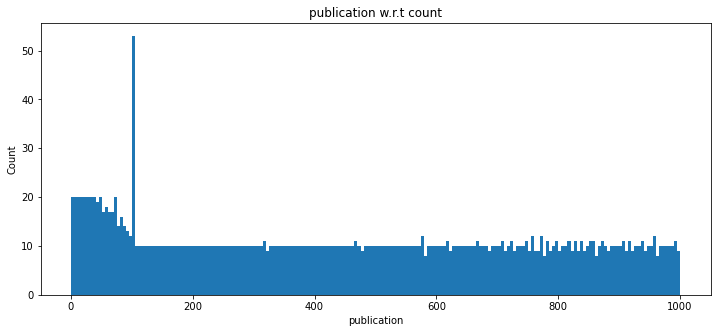

In [492]:
plt.figure(figsize=(12, 5))
plt.hist(data['publications'].values, bins=200)
plt.title('publication w.r.t count')
plt.xlabel('publication')
plt.ylabel('Count')
plt.show()

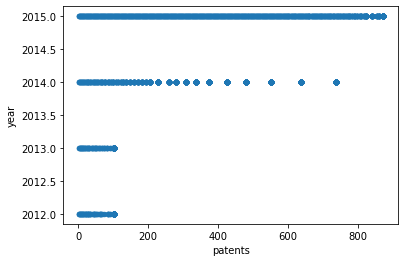

In [493]:
data.plot.scatter('patents','year')

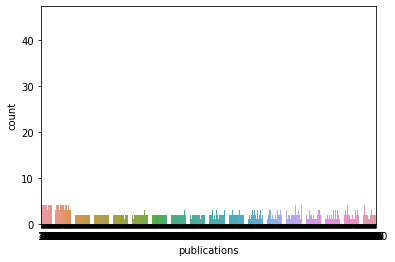

In [494]:
sns.countplot(data.publications)

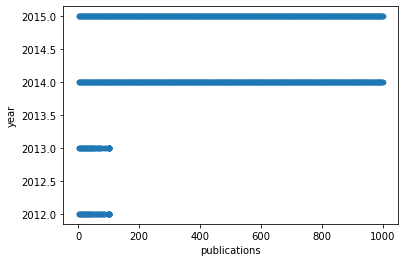

In [495]:
data.plot.scatter('publications','year')

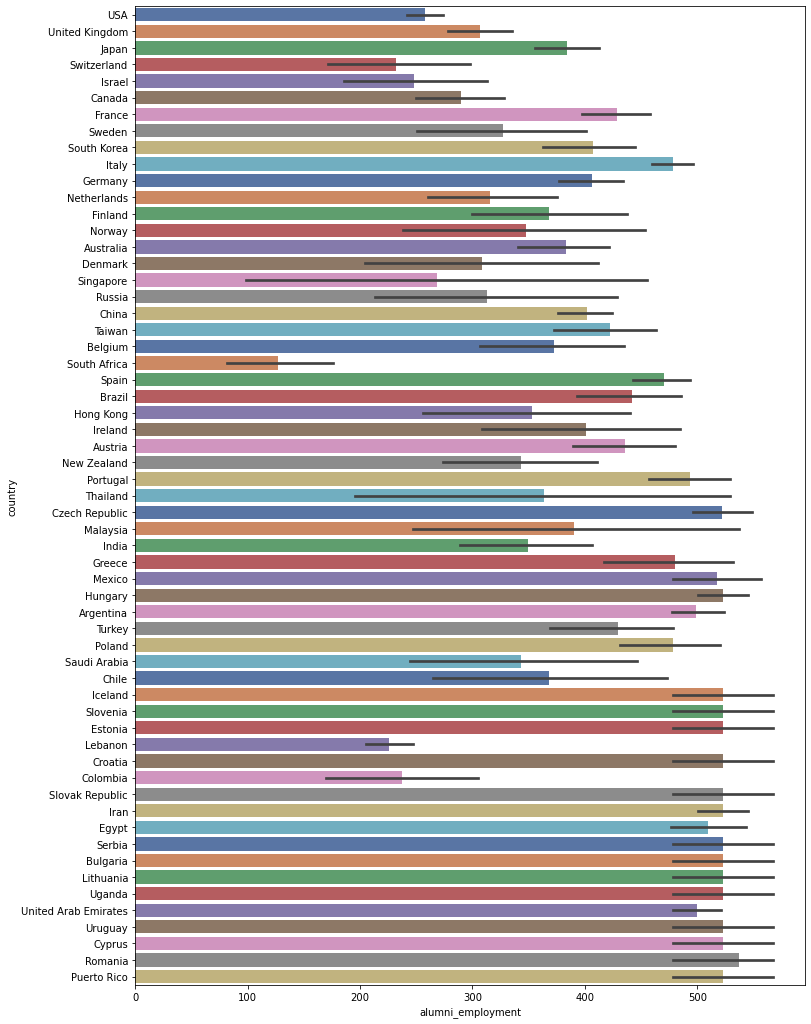

In [496]:
plt.figure(figsize=(12, 18))
sns.barplot(y=data['country'], x=data['alumni_employment'], palette="deep")

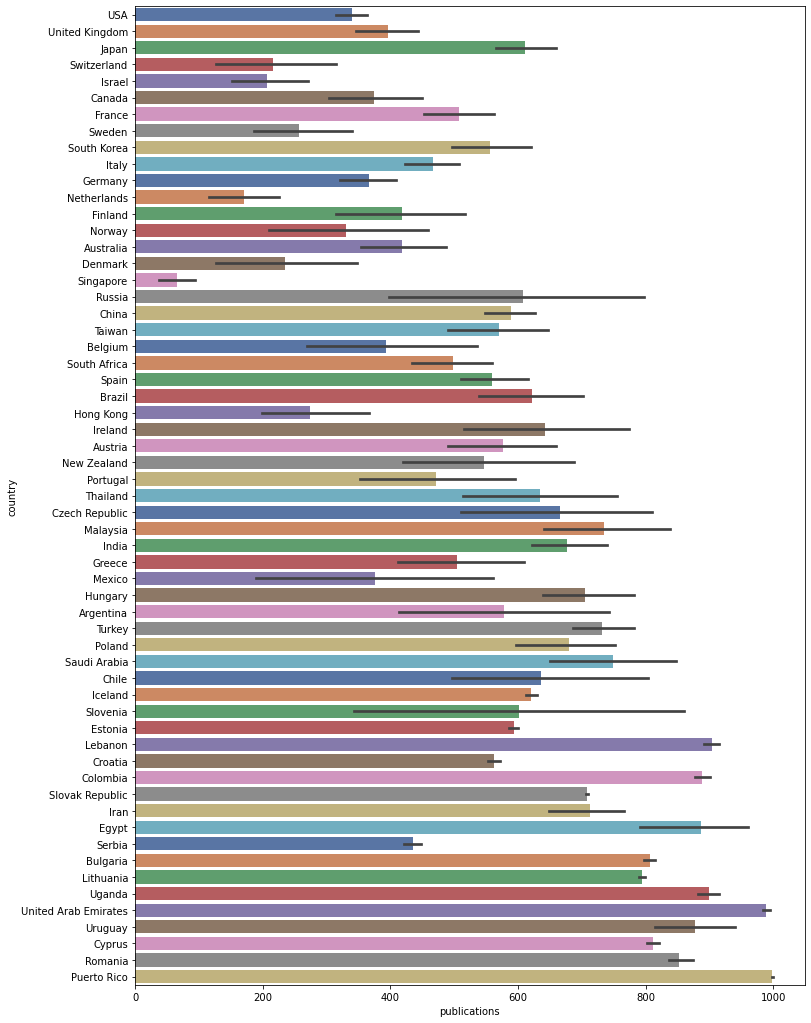

In [497]:
plt.figure(figsize=(12, 18))
sns.barplot(y=data['country'], x=data['publications'], palette="deep")

In [601]:
X = data[[ 'quality_of_faculty', 'publications', 'patents']]
y= data['quality_of_education']

X = X.drop(data[data['country'] =='USA'].index)
y = y.drop(data[data['country'] =='USA'].index)

In [602]:
X.head()

,quality_of_faculty,publications,patents
3,4,16,50
6,9,15,26
13,31,8,3
15,11,40,34
16,19,25,23


In [603]:
y.head()

3     10
6     13
13    32
15    26
16    42
Name: quality_of_education, dtype: int64

In [604]:
X.shape,y.shape

((1627, 3), (1627,))

In [605]:
from sklearn.model_selection import train_test_split

In [606]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [607]:
X_train,X_validation,Y_train,Y_validation=train_test_split(X,y,test_size=0.2,random_state=0)

In [608]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1301, 3), (172, 4), (401,), (172,))

In [609]:
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_validation_std=sc.transform(X_validation)

In [610]:
lr=LogisticRegression()
lr.fit(X_train_std,Y_train)
y_validation_pred=lr.predict(X_validation_std)
print(accuracy_score(y_validation_pred,Y_validation))

0.6503067484662577


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
